In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars_df = pd.read_csv('cars-2021-09-26 11-07-30.csv')

In [3]:
cars_df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
cars_df.head()

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT
0,https://bringatrailer.com/listing/1999-bmw-m3-...,Chassis: WBSBG9335XEY80827,1999,66k Miles,estoril blue metallic,light grey nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Fullerton, California 92833",2021-09-24,Private Party Or Dealer: Private Party,222,45000.0,Sold
1,https://bringatrailer.com/listing/1998-bmw-m3-...,Chassis: WBSBG9326WEY77926,1998,103k Miles,alpine white,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Portland, Oregon 97209",2021-09-22,Private Party Or Dealer: Dealer,245,28000.0,Sold
2,https://bringatrailer.com/listing/1999-bmw-m3-...,Chassis: WB5BG9334XEY83671,1999,81k Miles,estoril blue metallic paint,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Bend, Oregon 97701",2021-09-15,Private Party Or Dealer: Private Party,264,40500.0,Sold
3,https://bringatrailer.com/listing/1998-bmw-m3-...,Chassis: WBSCD9326WEE08819,1998,89k Miles Shown,titanium silver metallic,gray leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Lake Placid, Florida 33852",2021-09-14,Private Party Or Dealer: Private Party,116,13250.0,Sold
4,https://bringatrailer.com/listing/1996-bmw-m3-48/,Chassis: WBSBG9320TEY73396,1996,"194k Miles Shown, TMU",boston green metallic paint,modena nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Oakville, Ontario, Canada",2021-09-13,Private Party Or Dealer: Private Party,188,9000.0,Sold


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   URL           1115 non-null   object 
 1   VIN           1115 non-null   object 
 2   YEAR          1115 non-null   object 
 3   MILEAGE       1115 non-null   object 
 4   EXT_COLOR     1115 non-null   object 
 5   INT_COLOR     1115 non-null   object 
 6   TRANSMISSION  1115 non-null   object 
 7   BODY_STYLE    1115 non-null   object 
 8   LOCATION      1115 non-null   object 
 9   DATE_SOLD     1115 non-null   object 
 10  SELLER_TYPE   1115 non-null   object 
 11  NUM_PHOTOS    1115 non-null   int64  
 12  SALE_PRICE    1115 non-null   float64
 13  RESULT        1115 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 122.1+ KB


In [6]:
cars_df['DATE_SOLD'] = pd.to_datetime(cars_df['DATE_SOLD'])

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   URL           1115 non-null   object        
 1   VIN           1115 non-null   object        
 2   YEAR          1115 non-null   object        
 3   MILEAGE       1115 non-null   object        
 4   EXT_COLOR     1115 non-null   object        
 5   INT_COLOR     1115 non-null   object        
 6   TRANSMISSION  1115 non-null   object        
 7   BODY_STYLE    1115 non-null   object        
 8   LOCATION      1115 non-null   object        
 9   DATE_SOLD     1115 non-null   datetime64[ns]
 10  SELLER_TYPE   1115 non-null   object        
 11  NUM_PHOTOS    1115 non-null   int64         
 12  SALE_PRICE    1115 non-null   float64       
 13  RESULT        1115 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 122.1+ KB


In [8]:
cars_df[cars_df['YEAR'].str.contains('Unknown')]

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT
88,https://bringatrailer.com/listing/bmw-s50b32-e...,Unknown,Unknown,"110k Kilometers (~68k Miles) Reported, TMU",Unknown,Unknown,Unknown,Hard top,"Location: Bedford, Nova Scotia, Canada B4B1J7",2020-12-14,Private Party Or Dealer: Private Party,56,9100.0,Sold


In [9]:
cars_df[cars_df['YEAR'].str.contains('Unknown')] = np.nan

In [10]:
cars_df.dropna(how = 'any', inplace = True)

In [12]:
cars_df['VIN'].str.upper()

0       CHASSIS: WBSBG9335XEY80827
1       CHASSIS: WBSBG9326WEY77926
2       CHASSIS: WB5BG9334XEY83671
3       CHASSIS: WBSCD9326WEE08819
4       CHASSIS: WBSBG9320TEY73396
                   ...            
1110    CHASSIS: WBSDX9C52CE784660
1111    CHASSIS: WBSPM9C5XAE202064
1112    CHASSIS: WBSKG9C56CE797855
1113    CHASSIS: WBSWD93558PY42810
1114        VIN: WBSVA93568E041092
Name: VIN, Length: 1114, dtype: object

In [13]:
def clean_VIN(VIN):
    if re.search('[W]{1}[A-HJ-NPR-Z0-9]{16}', VIN) is not None:
        return re.search('[W]{1}[A-HJ-NPR-Z0-9]{16}', VIN).group(0)
    else:
        return np.nan

In [14]:
cars_df['VIN'] = cars_df['VIN'].map(clean_VIN)

In [17]:
cars_df[cars_df['VIN'].isna()]

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT
231,https://bringatrailer.com/listing/1995-bmw-m3-...,NaN,1995,Unknown,Unknown,Unknown,5-Speed ZF Manual Transmission,Hard top,"Location: Shelton, Connecticut 06484",2019-05-06,Private Party or Dealer: Private Party,86.0,26250.0,Sold
321,https://bringatrailer.com/listing/1999-bmw-m3-22/,NaN,1999,75k Miles,fern green metallic,Unknown,5-Speed Manual Transmission,Hard top,"Location: Lawrenceville, Georgia 30043",2017-12-28,Private Party or Dealer: Private Party,98.0,15150.0,Sold
331,https://bringatrailer.com/listing/1996-bmw-m3-...,NaN,1996,"53,906 Miles",Unknown,Unknown,E36 M3 5-Speed Automatic Transmission,Convertible,"Location: Dallas, Texas 75234",2017-11-03,Private Party or Dealer: Private Party,67.0,13565.0,Sold
337,https://bringatrailer.com/listing/1997-bmw-m3-36/,NaN,1997,"63,339 Miles",Unknown,Unknown,5-Speed Manual Transmission,Hard top,"Location: Mahopac, New York 10541",2017-10-17,Private Party or Dealer: Private Party,66.0,15750.0,Sold
341,https://bringatrailer.com/listing/1996-bmw-m3-7/,NaN,1996,"88,890 Miles",estoril blue,Unknown,5-Speed Manual Transmission,Hard top,"Location: Austin, Texas 78736",2017-10-09,Private Party or Dealer: Private Party,149.0,17250.0,Sold
345,https://bringatrailer.com/listing/1999-bmw-m3-17/,NaN,1999,"112,000 Miles",cosmosschwarz metallic,Unknown,5-Speed Manual Transmission,Hard top,"Location: Redwood City, California 94063",2017-09-22,Private Party or Dealer: Private Party,38.0,15500.0,Sold
353,https://bringatrailer.com/listing/1998-bmw-m3-...,NaN,1998,59k Miles,alpine white (300),light grey nappa leather (n5tt),5-Speed Manual Transmission,Convertible,"Location: Lawrenceville, Georgia 30044",2017-09-05,Private Party or Dealer: Private Party,91.0,10700.0,Reserve not met
354,https://bringatrailer.com/listing/1996-bmw-m3-5/,NaN,1996,"78,500 Miles",Unknown,Unknown,5-Speed Manual Transmission,Hard top,"Location: Blountville, Tennessee",2017-08-30,Private Party or Dealer: Private Party,114.0,13500.0,Sold
363,https://bringatrailer.com/listing/1997-bmw-m3-22/,NaN,1997,"102,200 Miles Shown",cosmos black,dove grey leather,5-Speed Manual Transmission,Hard top,"Location: Saint Louis, Missouri 63119",2017-05-09,Private Party or Dealer: Dealer,33.0,12000.0,Reserve not met
387,https://bringatrailer.com/listing/99-bmw-m3-co...,NaN,1999,67k Miles,estoril blue,Unknown,5-Speed Manual,Convertible,"Location: Cincinnati, Ohio",2016-09-28,Private Party or Dealer: Private Party,52.0,13499.0,Sold


In [18]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1114 entries, 0 to 1114
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   URL           1114 non-null   object        
 1   VIN           1092 non-null   object        
 2   YEAR          1114 non-null   object        
 3   MILEAGE       1114 non-null   object        
 4   EXT_COLOR     1114 non-null   object        
 5   INT_COLOR     1114 non-null   object        
 6   TRANSMISSION  1114 non-null   object        
 7   BODY_STYLE    1114 non-null   object        
 8   LOCATION      1114 non-null   object        
 9   DATE_SOLD     1114 non-null   datetime64[ns]
 10  SELLER_TYPE   1114 non-null   object        
 11  NUM_PHOTOS    1114 non-null   float64       
 12  SALE_PRICE    1114 non-null   float64       
 13  RESULT        1114 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 130.5+ KB


In [32]:
cars_df.dropna(subset = ['VIN'], inplace = True)

In [33]:
def get_ZIP(location):
    if re.search(r'[0-9]{5}', location) is not None:
        return re.search(r'[0-9]{5}', location).group(0)
    else:
        return np.nan

In [34]:
cars_df['ZIP'] = cars_df['LOCATION'].map(get_ZIP)

In [35]:
def get_transmission_type(transmission):
    automatic_keywords = ['auto', 'sequential', 'smg', 'dct', 'sequential', 'clutch']
    if any(word in transmission.lower() for word in automatic_keywords):
        return 'Automatic'
    else:
        return 'Manual'

In [36]:
cars_df['TRANSMISSION_TYPE'] = cars_df['TRANSMISSION'].map(get_transmission_type)

In [37]:
cars_df[['TRANSMISSION', 'TRANSMISSION_TYPE']].head(10)

,TRANSMISSION,TRANSMISSION_TYPE
0,Five-Speed Manual Transmission,Manual
1,Five-Speed Manual Transmission,Manual
2,Five-Speed Manual Transmission,Manual
3,Five-Speed Manual Transmission,Manual
4,Five-Speed Manual Transmission,Manual
5,Five-Speed Manual Transmission,Manual
6,Five-Speed Manual Transmission,Manual
7,Five-Speed Automatic Transmission,Automatic
8,5-Speed Manual Transmission,Manual
9,Five-Speed Manual Transmission,Manual


In [24]:
cars_df.head()

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,ZIP,TRANSMISSION_TYPE
0,https://bringatrailer.com/listing/1999-bmw-m3-...,WBSBG9335XEY80827,1999,66k Miles,estoril blue metallic,light grey nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Fullerton, California 92833",2021-09-24,Private Party Or Dealer: Private Party,222.0,45000.0,Sold,92833,Manual
1,https://bringatrailer.com/listing/1998-bmw-m3-...,WBSBG9326WEY77926,1998,103k Miles,alpine white,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Portland, Oregon 97209",2021-09-22,Private Party Or Dealer: Dealer,245.0,28000.0,Sold,97209,Manual
2,https://bringatrailer.com/listing/1999-bmw-m3-...,WB5BG9334XEY83671,1999,81k Miles,estoril blue metallic paint,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Bend, Oregon 97701",2021-09-15,Private Party Or Dealer: Private Party,264.0,40500.0,Sold,97701,Manual
3,https://bringatrailer.com/listing/1998-bmw-m3-...,WBSCD9326WEE08819,1998,89k Miles Shown,titanium silver metallic,gray leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Lake Placid, Florida 33852",2021-09-14,Private Party Or Dealer: Private Party,116.0,13250.0,Sold,33852,Manual
4,https://bringatrailer.com/listing/1996-bmw-m3-48/,WBSBG9320TEY73396,1996,"194k Miles Shown, TMU",boston green metallic paint,modena nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Oakville, Ontario, Canada",2021-09-13,Private Party Or Dealer: Private Party,188.0,9000.0,Sold,NaN,Manual


In [38]:
cars_df['SELLER_TYPE'] = cars_df['SELLER_TYPE'].str.lower()

In [39]:
cars_df['SELLER_TYPE'] = cars_df['SELLER_TYPE'].str.replace('private party or dealer:','')

In [40]:
cars_df['SELLER_TYPE'] = cars_df['SELLER_TYPE'].str.strip()

In [41]:
cars_df['SELLER_TYPE'].mask(cars_df['SELLER_TYPE'] == 'unknown', inplace = True)

In [42]:
def get_state(location):
    states = pd.read_csv('states.csv')
    for state in states['State']:
        if state in location:
            return state
    for index, abbreviation in enumerate(states['Abbreviation']):
        if abbreviation in location:
            return states.loc[index]['State']
    return np.nan

In [43]:
cars_df['STATE'] = cars_df['LOCATION'].map(get_state)

In [44]:
cars_df['STATE']

0       California
1           Oregon
2           Oregon
3          Florida
4              NaN
           ...    
1110    California
1111      Michigan
1112       Arizona
1113    California
1114    California
Name: STATE, Length: 1092, dtype: object

In [45]:
cars_df.dropna(subset = ['STATE'], inplace = True)

In [46]:
def clean_mileage(mileage):
    mileage = mileage.lower()
    if 'km' in mileage or 'kilometer' in mileage:
        return np.nan
    mileage = mileage.replace(',','')
    mileage = mileage.replace('~','')
    mileage = mileage.replace('x','0')
    mileage = mileage.replace('k','000')
    if re.search(r'[0-9]+', mileage):
        return int(re.search(r'[0-9]+', mileage).group(0))
    else:
        return np.nan

In [47]:
cars_df['MILEAGE_CLEAN'] = cars_df['MILEAGE'].map(clean_mileage)

In [48]:
cars_df[['MILEAGE', 'MILEAGE_CLEAN']].head(50)

,MILEAGE,MILEAGE_CLEAN
0,66k Miles,66000.0
1,103k Miles,103000.0
2,81k Miles,81000.0
3,89k Miles Shown,89000.0
5,162K Miles,162000.0
6,Unknown,0.0
7,54k Miles,54000.0
8,150k Miles,150000.0
9,118k Miles,118000.0
10,101k Miles Shown,101000.0


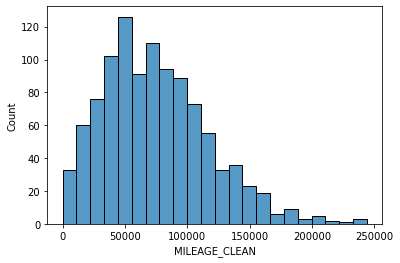

In [49]:
sns.histplot(cars_df['MILEAGE_CLEAN']);

In [50]:
cars_df['MILEAGE_CLEAN'].mask(cars_df['MILEAGE_CLEAN'] == 0, inplace = True)

In [51]:
cars_df.dropna(subset = ['MILEAGE_CLEAN'], inplace = True)

In [52]:
cars_df[cars_df['MILEAGE_CLEAN'] < 1000]

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,ZIP,TRANSMISSION_TYPE,STATE,MILEAGE_CLEAN
375,https://bringatrailer.com/listing/1995-bmw-m3-23/,WBSBF9325SEH07962,1995,100 Miles,Unknown,Unknown,5-Speed Manual Transmisison,Hard top,"Location: Ridgefield, Connecticut 06877",2017-02-10,dealer,202.0,154000.0,Reserve not met,06877,Manual,Connecticut,100.0
828,https://bringatrailer.com/listing/2004-bmw-m3-21/,WBSBL93454PN59133,2004,176 miles,carbon black metallic,black nappa leather,6-speed SMG II Transmission,Hard top,"Location: Makawao, Hawaii 96768",2018-08-09,private party,147.0,34250.0,Reserve not met,96768,Automatic,Hawaii,176.0
940,https://bringatrailer.com/listing/2012-bmw-m3-...,WBSPK91060E810823,2012,711 Miles Shown,frozen polar silver metallic,orange leather upholstery,7-Speed Dual-Clutch Transmission,Hard top,"Location: Huntington Station, New York 11746",2021-08-31,dealer,127.0,116000.0,Reserve not met,11746,Automatic,New York,711.0
1109,https://bringatrailer.com/listing/2013-bmw-m3-9/,WBSDX9C59DE785371,2013,18s Miles Shown,ruby black metallic,novillo black leather,M-DCT Transmission,Convertible,"Location: Pittsburgh, Pennsylvania 15213",2017-11-01,private party,90.0,37000.0,Sold,15213,Automatic,Pennsylvania,18.0


In [54]:
#I verified extreme low mileage cars manually. Corrected one  from 18 to 18000.
cars_df.loc[1109, 'MILEAGE_CLEAN'] = 18000

In [68]:
cars_df[cars_df['MILEAGE_CLEAN'] < 1000]

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,ZIP,TRANSMISSION_TYPE,STATE,MILEAGE_CLEAN,EXT_COLOR_CLEANED
828,https://bringatrailer.com/listing/2004-bmw-m3-21/,WBSBL93454PN59133,2004,176 miles,carbon black metallic,black nappa leather,6-speed SMG II Transmission,Hard top,"Location: Makawao, Hawaii 96768",2018-08-09,private party,147.0,34250.0,Reserve not met,96768,Automatic,Hawaii,176.0,Black
940,https://bringatrailer.com/listing/2012-bmw-m3-...,WBSPK91060E810823,2012,711 Miles Shown,frozen polar silver metallic,orange leather upholstery,7-Speed Dual-Clutch Transmission,Hard top,"Location: Huntington Station, New York 11746",2021-08-31,dealer,127.0,116000.0,Reserve not met,11746,Automatic,New York,711.0,Silver


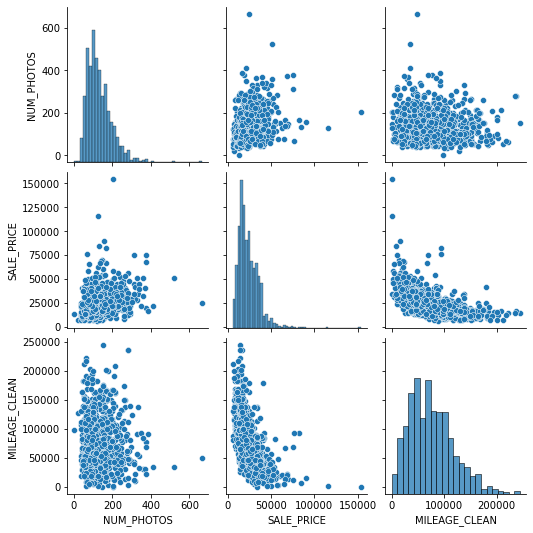

In [56]:
sns.pairplot(cars_df);

In [57]:
def get_ext_color(ext_color):
    #e36 colors: Alpine White II, Alpine White III, Ice White, Mugello Red, Brilliant Red, Dakar Yellow
    #diamond black metallic, cosmos black metallic, sterling silver metallic, arctic silver metallic,
    #polaris metallic (silver) ,avus blue metallic, glacier blue metallic, daytona violet metallic, boston green metallic,
    #british racing green
    
    #e46 colors: Alpine White III, Imola Red II, Jet Black, Laguna Seca Blue, Carbon Black metallic
    #Black Sapphire metallic, Titanium Silver metallic, Steel Grey metallic, Silver Grey metallic,
    #Topaz Blue metallic, Mystic Blue metallic, Interlagos Blue metallic, Fern Green metallic, Oxford Green II metallic,
    #Phoenix Yellow metallic
    
    #e92 colors: alpine white III, jet black, sparkling graphite metallic (gray), space grey metallic, mineral white metallic,
    #silverstone II metallic (silver), interlagos blue metallic, le mans blue metallic, jerez black metallic
    #melbourne red metallic, azurite black metallic, diopside black metallic, aventurine silver metallic,
    #ruby black metallic, moonstone metallic (silver)
    
    white_color_keywords = ['white', 'alpine', 'weiss', 'mineral']
    red_color_keywords = ['red', 'mugello', 'imola', 'melbourne', 'hellrot']
    yellow_color_keywords = ['yellow', 'dakar', 'phoenix']
    green_color_keywords = ['green', 'british racing', 'boston', 'fern', 'oxford']
    black_color_keywords = ['black', 'diamond', 'cosmos', 'carbon', 'sapphire', 'jet', 'jerez', 'azurite', 'diopside', 'ruby']
    silver_color_keywords = ['silver', 'sterling', 'arctic', 'polaris', 'titanium', 'aventurine', 'moonstone', 'arktis', 'silber']
    gray_color_keywords = ['gray', 'grey', 'steel', 'graphite', 'space']
    blue_color_keywords = ['blue', 'blau', 'estoril', 'avus', 'glacier', 'laguna seca', 'topaz', 'topas', 'mystic', 'interlagos', 'le mans']
    violet_color_keywords = ['violet', 'daytona']
    orange_color_keywords = ['orange', 'byzanz', 'fire', 'fyre']
    ext_color = ext_color.lower()

    if any(color in ext_color for color in white_color_keywords):
        return 'White'
    elif any(color in ext_color for color in red_color_keywords):
        return 'Red'
    elif any(color in ext_color for color in yellow_color_keywords):
        return 'Yellow'
    elif any(color in ext_color for color in green_color_keywords):
        return 'Green'
    elif any(color in ext_color for color in black_color_keywords):
        return 'Black'
    elif any(color in ext_color for color in silver_color_keywords):
        return 'Silver'
    elif any(color in ext_color for color in gray_color_keywords):
        return 'Gray'
    elif any(color in ext_color for color in blue_color_keywords):
        return 'Blue'
    elif any(color in ext_color for color in violet_color_keywords):
        return 'Violet'
    elif any(color in ext_color for color in orange_color_keywords):
        return 'Orange'
    else:
        return 'Unknown'
    
    


In [58]:
cars_df['EXT_COLOR_CLEANED'] = cars_df['EXT_COLOR'].map(get_ext_color)

In [59]:
cars_df[['EXT_COLOR', 'EXT_COLOR_CLEANED']].head(50)

,EXT_COLOR,EXT_COLOR_CLEANED
0,estoril blue metallic,Blue
1,alpine white,White
2,estoril blue metallic paint,Blue
3,titanium silver metallic,Silver
5,brilliant red paint,Red
7,arctic silver paint,Silver
8,estoril blue metallic paint,Blue
9,arctic silver metallic paint,Silver
10,hellrot red paint,Red
11,arctic silver metallic,Silver


In [60]:
cars_df['EXT_COLOR_CLEANED'].value_counts()

Silver     218
Black      206
Blue       156
White      127
Red        111
Unknown    105
Gray        43
Yellow      30
Green       19
Violet      18
Orange       8
Name: EXT_COLOR_CLEANED, dtype: int64

In [61]:
cars_df[cars_df['EXT_COLOR_CLEANED'] == 'Unknown'].head(60)

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,ZIP,TRANSMISSION_TYPE,STATE,MILEAGE_CLEAN,EXT_COLOR_CLEANED
170,https://bringatrailer.com/listing/1995-bmw-m3-...,WBSBF9320SEH00806,1995,151k Miles Shown,Unknown,Unknown,Five-Speed Manual Transmission,Hard top,"Location: Danville, California 94526",2019-12-24,private party,170.0,16000.0,Sold,94526,Manual,California,151000.0,Unknown
193,https://bringatrailer.com/listing/1995-bmw-m3-...,WBSBF932XSEH02708,1995,116k Miles Shown,Unknown,Unknown,Five-Speed Manual Transmission,Hard top,"Location: Seymour, Indiana 47274",2019-09-17,private party,124.0,13750.0,Reserve not met,47274,Manual,Indiana,116000.0,Unknown
249,https://bringatrailer.com/listing/1999-bmw-m3-53/,WBSBG9332XEY80767,1999,117k Miles,Unknown,Unknown,5-Speed Manual Transmission,Hard top,"Location: Minneapolis, Minnesota 55416",2019-01-25,dealer,99.0,8450.0,Reserve not met,55416,Manual,Minnesota,117000.0,Unknown
251,https://bringatrailer.com/listing/1999-bmw-m3-52/,WBSBG9337XEY82840,1999,183k Miles,Unknown,Unknown,5-Speed Manual,Hard top,"Location: Bonney Lake, Washington 98391",2019-01-17,private party,47.0,16000.0,Sold,98391,Manual,Washington,183000.0,Unknown
267,https://bringatrailer.com/listing/1995-bmw-m3-83/,WBSBF9320SEH04824,1995,"202,814 Miles Shown",Unknown,Unknown,5-Speed Manual Gearbox,Hard top,"Location: Fair Oaks, California 95628",2018-11-14,private party,83.0,11899.0,Sold,95628,Manual,California,202814.0,Unknown
276,https://bringatrailer.com/listing/1995-bmw-m3-77/,WBSBF9328SEH00584,1995,182k Miles Shown,Unknown,Unknown,5-Speed Manual Transmission,Hard top,"Location: Walnut Creek, California",2018-10-09,private party,55.0,11000.0,Sold,NaN,Manual,California,182000.0,Unknown
279,https://bringatrailer.com/listing/1997-bmw-m3-90/,WBSBG932XVEY75403,1997,153k Indicated Miles,Unknown,Unknown,5-Speed Manual Gearbox,Hard top,"Location: Saint Louis, Missouri 63108",2018-10-01,private party,62.0,17500.0,Sold,63108,Manual,Missouri,153000.0,Unknown
282,https://bringatrailer.com/listing/1998-bmw-m3-...,WBSBK9335WEC42125,1998,45k Miles Shown,Unknown,Unknown,5-Speed Manual Gearbox,Convertible,"Location: San Rafael, California 94901",2018-09-25,dealer,73.0,17777.0,Sold,94901,Manual,California,45000.0,Unknown
287,https://bringatrailer.com/listing/1997-bmw-m3-88/,WBSBG9328VEY77053,1997,"57,275 Miles Shown",Unknown,Unknown,5-Speed Manual,Hard top,"Location: Madison, Alabama",2018-09-10,private party,94.0,24500.0,Sold,NaN,Manual,Alabama,57275.0,Unknown
296,https://bringatrailer.com/listing/1998-bmw-m3-16/,WBSBG9327WEY77403,1998,40k Miles Shown,Unknown,Unknown,5-Speed Manual Transmission,Hard top,"Location: Indianapolis, Indiana 46268",2018-07-12,dealer,66.0,21250.0,Sold,46268,Manual,Indiana,40000.0,Unknown


In [62]:
cars_df['EXT_COLOR_CLEANED'].mask(cars_df['EXT_COLOR_CLEANED'] == 'Unknown', inplace = True)

In [63]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 0 to 1114
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   URL                1041 non-null   object        
 1   VIN                1041 non-null   object        
 2   YEAR               1041 non-null   object        
 3   MILEAGE            1041 non-null   object        
 4   EXT_COLOR          1041 non-null   object        
 5   INT_COLOR          1041 non-null   object        
 6   TRANSMISSION       1041 non-null   object        
 7   BODY_STYLE         1041 non-null   object        
 8   LOCATION           1041 non-null   object        
 9   DATE_SOLD          1041 non-null   datetime64[ns]
 10  SELLER_TYPE        1040 non-null   object        
 11  NUM_PHOTOS         1041 non-null   float64       
 12  SALE_PRICE         1041 non-null   float64       
 13  RESULT             1041 non-null   object        
 14  ZIP     

In [64]:
cars_df.dropna(how = 'any', inplace = True)

In [65]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 1111
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   URL                895 non-null    object        
 1   VIN                895 non-null    object        
 2   YEAR               895 non-null    object        
 3   MILEAGE            895 non-null    object        
 4   EXT_COLOR          895 non-null    object        
 5   INT_COLOR          895 non-null    object        
 6   TRANSMISSION       895 non-null    object        
 7   BODY_STYLE         895 non-null    object        
 8   LOCATION           895 non-null    object        
 9   DATE_SOLD          895 non-null    datetime64[ns]
 10  SELLER_TYPE        895 non-null    object        
 11  NUM_PHOTOS         895 non-null    float64       
 12  SALE_PRICE         895 non-null    float64       
 13  RESULT             895 non-null    object        
 14  ZIP      

In [66]:
cars_df.head()

,URL,VIN,YEAR,MILEAGE,EXT_COLOR,INT_COLOR,TRANSMISSION,BODY_STYLE,LOCATION,DATE_SOLD,SELLER_TYPE,NUM_PHOTOS,SALE_PRICE,RESULT,ZIP,TRANSMISSION_TYPE,STATE,MILEAGE_CLEAN,EXT_COLOR_CLEANED
0,https://bringatrailer.com/listing/1999-bmw-m3-...,WBSBG9335XEY80827,1999,66k Miles,estoril blue metallic,light grey nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Fullerton, California 92833",2021-09-24,private party,222.0,45000.0,Sold,92833,Manual,California,66000.0,Blue
1,https://bringatrailer.com/listing/1998-bmw-m3-...,WBSBG9326WEY77926,1998,103k Miles,alpine white,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Portland, Oregon 97209",2021-09-22,dealer,245.0,28000.0,Sold,97209,Manual,Oregon,103000.0,White
2,https://bringatrailer.com/listing/1999-bmw-m3-...,WB5BG9334XEY83671,1999,81k Miles,estoril blue metallic paint,black nappa leather,Five-Speed Manual Transmission,Hard top,"Location: Bend, Oregon 97701",2021-09-15,private party,264.0,40500.0,Sold,97701,Manual,Oregon,81000.0,Blue
3,https://bringatrailer.com/listing/1998-bmw-m3-...,WBSCD9326WEE08819,1998,89k Miles Shown,titanium silver metallic,gray leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Lake Placid, Florida 33852",2021-09-14,private party,116.0,13250.0,Sold,33852,Manual,Florida,89000.0,Silver
5,https://bringatrailer.com/listing/1995-bmw-m3-...,WBSBF9323SEH03781,1995,162K Miles,brilliant red paint,black nappa leather upholstery,Five-Speed Manual Transmission,Hard top,"Location: Muncie, Indiana 47303",2021-09-10,dealer,215.0,14000.0,Sold,47303,Manual,Indiana,162000.0,Red


In [67]:
cars_df.to_csv('cars_cleaned.csv')